In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data=pd.Series(np.random.randn(10000)*100)#随机生成数据
u=data.mean()#计算均值

In [2]:
std=data.std()#计算标准差
stats.kstest(data,'norm',(u,std))
print('均值为：%.3f,标准差为：%.3f'%(u,std))

均值为：-0.878,标准差为：99.477


<Axes: title={'center': 'Density curve'}, ylabel='Density'>

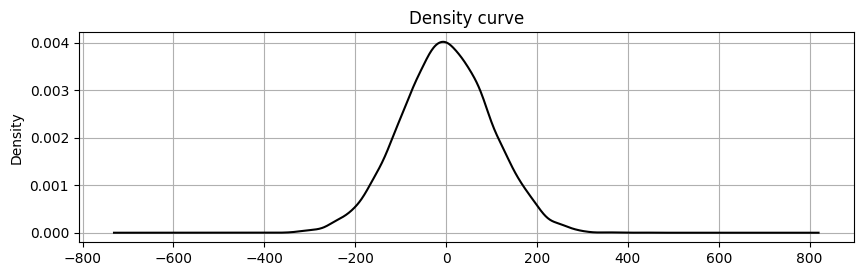

In [5]:
#绘制数据密度曲线
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,1,1)
data.plot(kind='kde',grid=True,style='-k',title='Density curve')

In [9]:
#查找并剔除异常值
ax2=fig.add_subplot(2,1,2)
error=data[np.abs(data -u)>3*std]
data_c=data[np.abs(data-u)<=3*std]
len(error)

23

<Axes: >

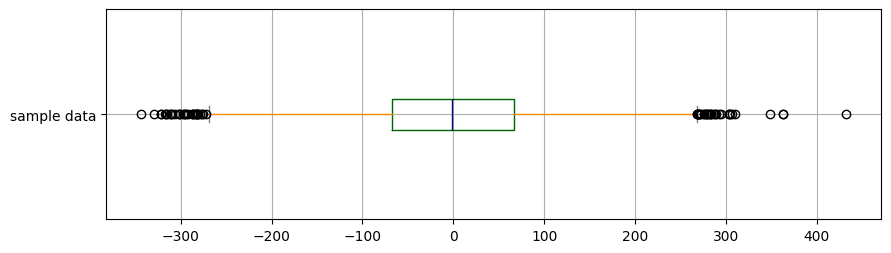

In [18]:
#使用箱型图查看数据分布
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,1,1)
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
data.plot.box(vert=False,grid=True,color=color,ax=ax1,label = 'sample data')

In [22]:
#计算分位差
s = data.describe()#书上没有这行，就报错了
q1=s['25%']
q3=s['75%']
iqr=q3-q1
mi=q1-1.5*iqr
ma=q3+1.5*iqr
print('分位差为：%.3f，下限为：%.3f,上限为：%.3f'%(iqr,mi,ma))

分位差为：134.171，下限为：-269.068,上限为：267.615


In [24]:
#根据分位差的上下限筛选出异常值error,剔除异常值之后的数据为data_c
ax2=fig.add_subplot(2,1,2)
error=data[(data<mi)|(data>ma)]
data_c=data[(data>=mi)&(data<=ma)]
print('异常值共%i条'%len(error))

异常值共63条
